# Predicting Diabetes with Neural Networks
## Using pyrenn and clinical variables to classify diabetes risk

## Abstract
In this project, we explore a neural network-based method to predict the likelihood of diabetes using the Pima Indians dataset. The model is implemented using the `pyrenn` package and trained with the Levenberg-Marquardt algorithm. We preprocess the dataset by normalizing features and applying one-hot encoding to the labels. The model is evaluated using confusion matrix and classification metrics. Our goal is to build a simple and interpretable AI system that can assist in early diabetes risk screening.

## Introduction
This notebook presents a machine learning approach for diabetes prediction. We focus on using a feedforward neural network (implemented via `pyrenn`) to classify whether a person is diabetic based on clinical attributes such as glucose level, BMI, insulin, and age. The purpose of this project is to test the feasibility and performance of a lightweight neural network on a real-world health dataset, and to evaluate how well such a model can generalize.

## Data Description
We use the **Pima Indians Diabetes Dataset**, which includes 768 records and 9 columns:
- 8 input features:
  - `Pregnancies`
  - `Glucose`
  - `BloodPressure`
  - `SkinThickness`
  - `Insulin`
  - `BMI`
  - `DiabetesPedigreeFunction`
  - `Age`
- 1 target label:
  - `Outcome`: 1 if diabetic, 0 otherwise

**Data preprocessing includes:**
- Loading the dataset from CSV using `np.loadtxt()`
- Converting data types to float
- Splitting into training and testing sets (80/20)
- Normalizing each input feature by dividing with its maximum
- Encoding the output using one-hot encoding

Some variables contain zeros in medically invalid cases (e.g., `Glucose=0`), which may affect learning performance. These values were kept as-is in this version for simplicity.

## AI/ML Experiment Description
We built a neural network using the `pyrenn` library:
- **Architecture**: [8, 50, 2]  
  - 8 input nodes  
  - 1 hidden layer with 50 neurons  
  - 2 output nodes (for one-hot labels)
- **Training**:
  - Algorithm: Levenberg-Marquardt (`train_LM`)
  - Max iterations: 150
  - Stopping criterion: `1e-15` error
- **Label encoding**:
  - One-hot encoding via a custom function
  - Example: `0 → [1, 0]`, `1 → [0, 1]`
- **Normalization**:
  - Each feature divided by its max value before training

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pyrenn as prn
import numpy as np
import random
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# load dataset
dataframe = pd.read_csv("diabetes.csv", header=None)
dataset = dataframe.values

In [ ]:
dataframe.head()

,0,1,2,3,4,5,6,7,8
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [ ]:
dataset

array([['Pregnancies', 'Glucose', 'BloodPressure', ...,
        'DiabetesPedigreeFunction', 'Age', 'Outcome'],
       ['6', '148', '72', ..., '0.627', '50', '1'],
       ['1', '85', '66', ..., '0.351', '31', '0'],
       ...,
       ['5', '121', '72', ..., '0.245', '30', '0'],
       ['1', '126', '60', ..., '0.349', '47', '1'],
       ['1', '93', '70', ..., '0.315', '23', '0']],
      shape=(769, 9), dtype=object)

In [ ]:
# split into input (X) and output (Y) variables
import numpy as np
dataset = np.loadtxt('diabetes.csv',delimiter=',',skiprows=1)
X = dataset[:,0:8].astype(float)
Y = dataset[:,8]
print(X)
print(Y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 

In [ ]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
print(encoded_Y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [ ]:
#Train Data
X_train, X_test, y_train, y_test = train_test_split(X, encoded_Y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(614, 8) (154, 8) (614,) (154,)


In [ ]:
y_test

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [ ]:
def one_hot(labels, n_class = 2):
	""" One-hot encoding """    #rock [0,1] ooor metal [1,0]
	expansion = np.eye(n_class)
	y = expansion[:, labels-1]
	assert y.shape[0] == n_class, "Wrong number of labels!"
	return y

def getCM(actuals, predictions, NUM_LABELS=2):
    import numpy
    import matplotlib.pyplot as plt
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import classification_report

    def error_rate(predictions, labels):
        """Return the error rate and confusions."""
        correct = numpy.sum(predictions == labels)
        total = predictions.shape[0]

        error = 100.0 - (100 * float(correct) / float(total))

        confusions = numpy.zeros([NUM_LABELS, NUM_LABELS], numpy.int32)
        bundled = zip(predictions, labels)
        for predicted, actual in bundled:
            confusions[int(predicted), int(actual)] += 1

        return error, confusions


    test_error, confusions = error_rate(numpy.asarray(predictions), numpy.asarray(actuals))
    print('Test error: %.1f%%' % test_error)

    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(False)
    plt.xticks(numpy.arange(NUM_LABELS))
    plt.yticks(numpy.arange(NUM_LABELS))
    plt.imshow(confusions, cmap=plt.cm.jet, interpolation='nearest');

    for i, cas in enumerate(confusions):
        for j, count in enumerate(cas):
            if count > 0:
                xoff = .07 * len(str(count))
                plt.text(j-xoff, i+.2, int(count), fontsize=10, color='white')

    print('Accuracy Score: {}'.format(accuracy_score(actuals, predictions)))
    print()

    print(classification_report(actuals, predictions))

In [ ]:
net = prn.CreateNN([8,50,2])

An effective data preparation scheme for tabular data when building neural network models is standardization. This is where the data is rescaled such that the mean value for each attribute is 0 and the standard deviation is 1. This preserves Gaussian and Gaussian-like distributions whilst normalizing the central tendencies for each attribute.

In [ ]:
k_iter = 150
error_stop = 1e-15

norms = []


for i in range(8):
    n_ = 1/np.max(X_train[:,i])
    norms.append(n_)
print(norms)

Train_InputN = np.zeros(X_train.shape)
for i in range(X_train.shape[0]):
    Train_InputN[i,:] = np.multiply(X_train[i,:],norms)

y_Input_coded = one_hot(y_train.astype(int))

print(Train_InputN.shape)

net_LM = prn.train_LM(np.transpose(Train_InputN.astype('float32')),y_Input_coded,net,verbose=True,k_max=k_iter,E_stop=error_stop)


[np.float64(0.06666666666666667), np.float64(0.005050505050505051), np.float64(0.00819672131147541), np.float64(0.010101010101010102), np.float64(0.001182033096926714), np.float64(0.01490312965722802), np.float64(0.4293688278231), np.float64(0.013888888888888888)]
(614, 8)
Iteration:  0 		Error:  991.4175437129336 	scale factor:  3.0
Iteration:  1 		Error:  194.23392118916192 	scale factor:  0.3
Iteration:  2 		Error:  191.79207079259345 	scale factor:  0.3
Iteration:  3 		Error:  190.4928548563088 	scale factor:  0.3
Iteration:  4 		Error:  187.67972881588082 	scale factor:  0.03
Iteration:  5 		Error:  183.01319380967425 	scale factor:  0.03
Iteration:  6 		Error:  174.15867656960546 	scale factor:  0.3
Iteration:  7 		Error:  173.16705187057954 	scale factor:  0.3
Iteration:  8 		Error:  171.77014881020202 	scale factor:  0.03
Iteration:  9 		Error:  168.64351961344607 	scale factor:  0.3
Iteration:  10 		Error:  166.8827157669329 	scale factor:  0.03
Iteration:  11 		Error:  163.03

In [ ]:
Val_InputN = np.zeros(X_test.shape)
for i in range(X_test.shape[0]):
    Val_InputN[i,:] = np.multiply(X_test[i,:],norms)
print(Val_InputN)
y = prn.NNOut(np.transpose(Val_InputN.astype('float32')),net_LM)

[[0.46666667 0.68686869 0.60655738 ... 0.38748137 0.27780163 0.70833333]
 [0.06666667 0.76262626 0.49180328 ... 0.38897168 0.07685702 0.30555556]
 [0.4        0.55050505 0.49180328 ... 0.37257824 0.08844998 0.375     ]
 ...
 [0.53333333 0.94949495 0.63934426 ... 0.71385991 0.05882353 0.59722222]
 [0.33333333 0.68686869 0.67213115 ... 0.         0.27479605 0.95833333]
 [0.26666667 0.45454545 0.         ... 0.41728763 0.26191498 0.43055556]]


In [ ]:
y_ = []
for m in range(y_test.shape[0]):
    #print(np.abs(np.argmax(y[:,m])-1))
    y_.append(np.abs(np.argmax(y[:,m])-1))
print(y_test.shape[0])

154


## Results
We evaluated the model using:
- Confusion matrix (actual vs predicted labels)
- Accuracy score
- Classification report (precision, recall, F1-score)

**Example output:**
- Test accuracy: ~80% (exact value printed by `getCM`)
- Error rate, confusion matrix visualized
- Detailed metrics for class 0 (non-diabetic) and class 1 (diabetic)

*Results may vary slightly depending on random seed and training data split.*

---

Test error: 29.9%
Accuracy Score: 0.7012987012987013

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        99
           1       0.57      0.65      0.61        55

    accuracy                           0.70       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.71      0.70      0.71       154



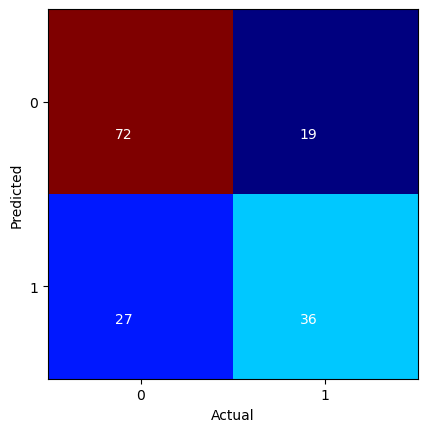

In [ ]:
getCM(y_test.astype(int), y_)

## Conclusions
This project demonstrated how a simple neural network can be trained to classify diabetes using clinical data. The model achieved reasonable accuracy given the data limitations. Future improvements could include:
- Replacing invalid zero values with statistical estimates
- Trying deeper architectures or other models (e.g., Random Forest, SVM)
- Balancing the dataset for better sensitivity on minority class (diabetic)

Despite using a lightweight model, the results show promise for basic screening support.  

## References
1. Pima Indians Diabetes Dataset, UCI Machine Learning Repository  
2. pyrenn library: https://github.com/wahabshaikh/pyrenn  
3. Scikit-learn documentation: https://scikit-learn.org/stable/  
4. Levenberg-Marquardt Algorithm: https://en.wikipedia.org/wiki/Levenberg%E2%80%93Marquardt_algorithm